# Hotel Booking Demand
[More Details about the DataSet](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

In [1]:
# importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
sns.set_palette('Set2')

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

# Functions

In [3]:
def plot_text(plt_object, bar_type, params):
    """
    Function to plot the values on the graph
    """
    
    for rect in plt_object.patches:
    
        height = rect.get_height()
        width = rect.get_width()

        x = rect.get_x()
        y = rect.get_y()
        
         # Displaying the Population Along the Horizontal Bars
        if bar_type == 'h':
            label_text = f'{round(width, 2)}'
            label_x = x + width + params[0]    
            label_y = y + height + params[1]  
        
        # Displaying the Population on top of the Vertical Bars
        elif bar_type == 'v':
            label_text = f'{round(height, 2)}'
            label_x = x + width + params[0]
            label_y = y + height + params[1]
            
        plt_object.text(label_x, label_y, label_text)
    

## 1) Checking for Null Values

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# The company & agent columns contains too much null values, so we can drop them
df.drop(['company', 'agent'], axis=1, inplace=True)

# Fill the missing country column with most repeating value
country = df['country'].value_counts().index[0]
df['country'].fillna(value=country, inplace=True)

# Fill the missing country column with most repeating value
country = df['country'].value_counts().index[0]
df['country'].fillna(value=country, inplace=True)


# Fill the missing country column with most repeating value
children = df['children'].value_counts().index[0]
df['children'].fillna(value=children, inplace=True)
df['children'] = df['children'].astype('int64')

In [6]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**All the missing values have been cleaned**

## 2) Explatory Data Analysis

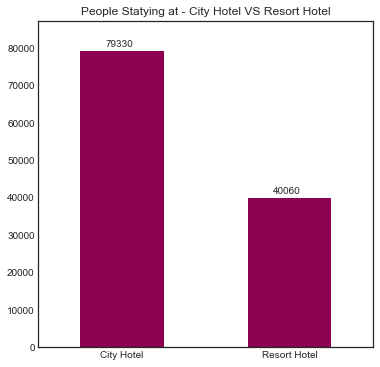

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting Barplot of People Staying at City Hotel and Resort Hotel
df['hotel'].value_counts().plot(kind='bar', cmap='PiYG')

plt.xticks(rotation='horizontal');
plt.margins(x=0.2, y=0.1, tight=True)

ax.set(title='People Statying at - City Hotel VS Resort Hotel')

plot_text(plt_object=ax, bar_type='v', params=(-0.35, 1000))

**There are More bookings for city hotels than Resort Hotels**

**There are some columns where there are 0 adults & 0 children, which cannot be possible, So we will replace the values in the adults column where number of adults & number of children is 0 with the mode of adults column**

In [8]:
# Finding the mode of the adults column
mode = df['adults'].mode()[0]

# Replaci
df.loc[((df['adults'] == 0) & (df['children'] == 0)), 'adults'] = mode

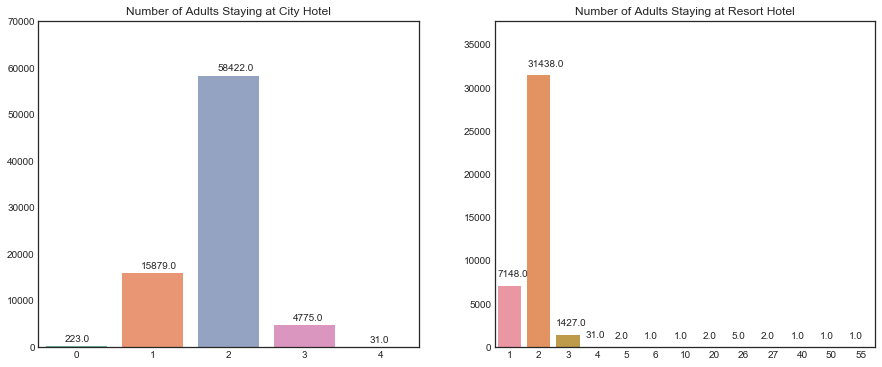

In [9]:
fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)

# Margin for 1st Subplot
ax[0].margins(x=0.2, y=0.2, tight=True)

# Labels & Values for BarPLot 1
labels = df[df['hotel']=='City Hotel']['adults'].value_counts().index 
values = df[df['hotel']=='City Hotel']['adults'].value_counts().values

# Plotting the BarPlot
sns.barplot(x=labels, y=values, ax=ax[0])

# Setting the Title
ax[0].set(title='Number of Adults Staying at City Hotel')

# Setting Text above the Bars
plot_text(plt_object=ax[0], bar_type='v', params=(-0.55, 1000))



# Margin for 2nd Subplot
ax[1].margins(x=0.5, y=0.2, tight=True)

# Labels & Values for BarPLot 2
labels = df[df['hotel']=='Resort Hotel']['adults'].value_counts().index
values = df[df['hotel']=='Resort Hotel']['adults'].value_counts().values

# Plotting the BarPlot
sns.barplot(x=labels, y=values, ax=ax[1])

# Setting the Title
ax[1].set(title='Number of Adults Staying at Resort Hotel')

# Setting Text above the Bars
plot_text(plt_object=ax[1], bar_type='v', params=(-0.8, 1000))

- **We can observe that the majority people staying at City Hotels & Resort Hotels are mostly Couples**
- **We can also observe that when there are more than four adults, they tend to stay at resorts more. This could happen because only 4 people can share City Hotel Rooms where as In Resort Hotels more people can stay in one room**

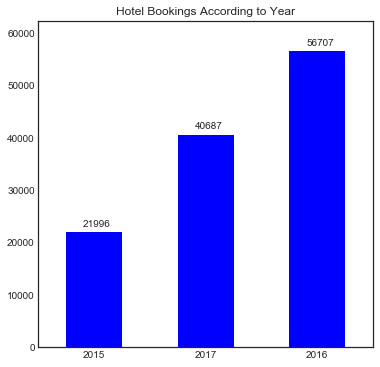

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting Barplot of Hotel Bookings according to Year
df['arrival_date_year'].value_counts()[::-1].plot(kind='bar', cmap='bwr')

plt.xticks(rotation='horizontal');
plt.margins(x=0.2, y=0.1, tight=True)

ax.set(title='Hotel Bookings According to Year')

plot_text(plt_object=ax, bar_type='v', params=(-0.35, 1000))

**We can observe an increase every year in number of Hotel Bookings** 

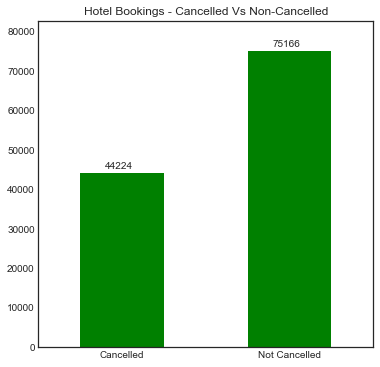

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting Barplot of Cancellations & Non Cancellations
df['is_canceled'].value_counts()[::-1].plot(kind='bar', cmap='ocean')

labels = ['Cancelled', 'Not Cancelled']

plt.xticks(rotation=0)
ax.set_xticklabels(labels)

plt.margins(x=0.2, y=0.1, tight=True)

ax.set(title='Hotel Bookings - Cancelled Vs Non-Cancelled')

plot_text(plt_object=ax, bar_type='v', params=(-0.35, 1000))

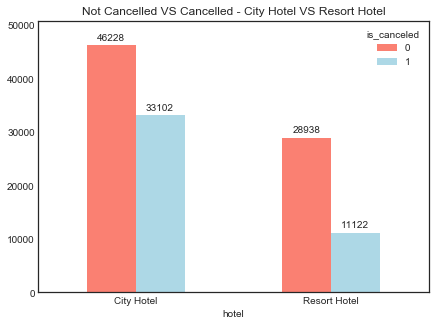

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))

pd.crosstab(df['hotel'], df['is_canceled']).plot(kind='bar',
                                            figsize=[7,5], color=['salmon', 'lightblue'], ax=ax)
plt.margins(x=0.2, y=0.1, tight=True)
plt.xticks(rotation=0)

ax.set(title='Not Cancelled VS Cancelled - City Hotel VS Resort Hotel')

plot_text(plt_object=ax, bar_type='v', params=(-0.2, 1000))

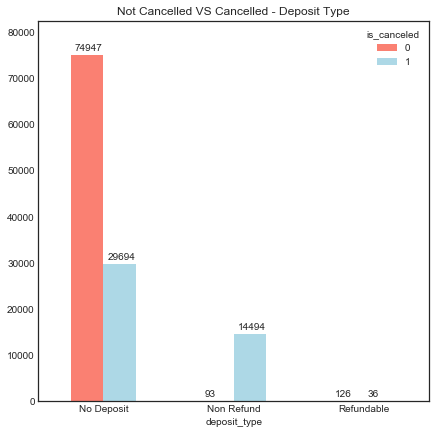

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

pd.crosstab(df['deposit_type'], df['is_canceled']).plot(kind='bar',
                                   figsize=[7,7], color=['salmon', 'lightblue'] , ax=ax)

plt.margins(x=0.2, y=0.1, tight=True)
plt.xticks(rotation=0)

ax.set(title='Not Cancelled VS Cancelled - Deposit Type')

plot_text(plt_object=ax, bar_type='v', params=(-0.22, 1000))

**The people who made Non-Refundable deposit are more likely to cancel, which is very strange**

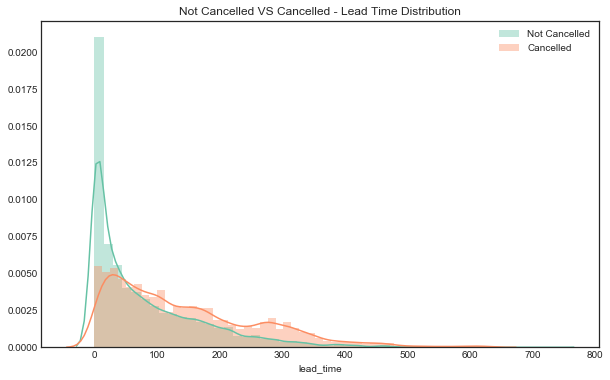

In [14]:
plt.figure(figsize=(10,6))

plt.title('Not Cancelled VS Cancelled - Lead Time Distribution');

sns.distplot(a=df[df['is_canceled'] == 0]['lead_time'], label='Not Cancelled')
sns.distplot(a=df[df['is_canceled'] == 1]['lead_time'], label='Cancelled');

plt.legend();

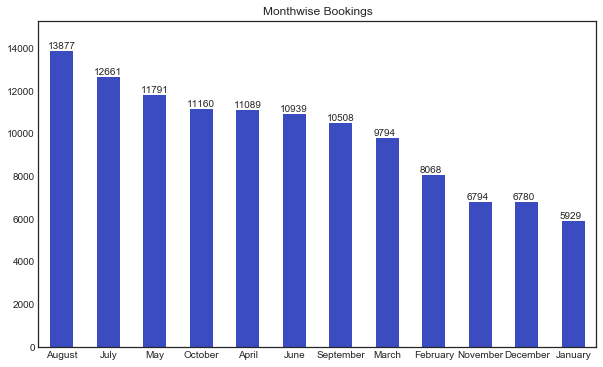

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting Barplot of People Staying at City Hotel and Resort Hotel
df['arrival_date_month'].value_counts().plot(kind='bar', cmap='coolwarm')

plt.xticks(rotation='horizontal');
plt.margins(x=0.2, y=0.1, tight=True)

ax.set(title='Monthwise Bookings')

plot_text(plt_object=ax, bar_type='v', params=(-0.55, 100))

**There are more bookings during the middle of the year, there are very less bookings at the end of the year & Start of the New year**

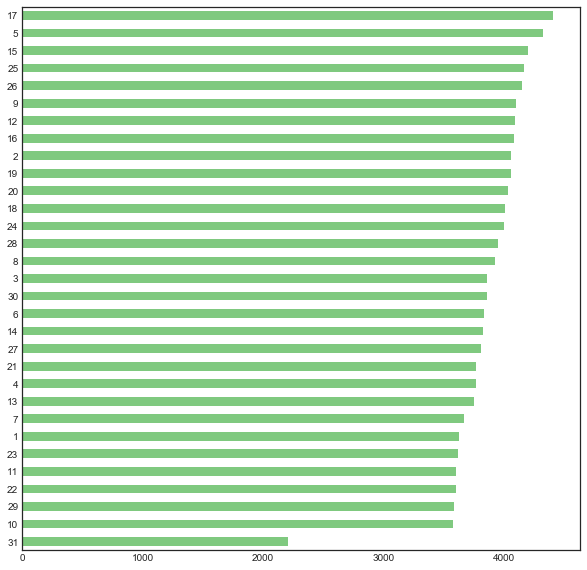

In [16]:
plt.figure(figsize=(10,10))
df['arrival_date_day_of_month'].value_counts()[::-1].plot(kind='barh', cmap='Accent');

**People don't prefer to stay in Hotels on Month End**

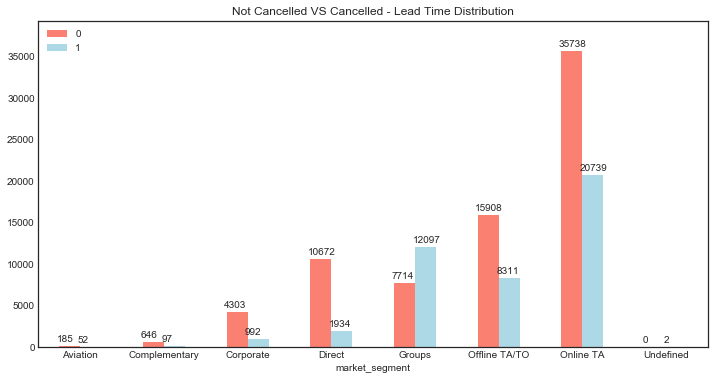

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

pd.crosstab(df['market_segment'], df['is_canceled']).plot(kind='bar',
                                            color=['salmon', 'lightblue'], ax=ax)

plt.xticks(rotation=0);
plt.margins(x=0.2, y=0.1, tight=True)
ax.legend(loc=2)

plt.title('Not Cancelled VS Cancelled - Lead Time Distribution');

plot_text(plt_object=ax, bar_type='v', params=(-0.28, 500))

**People From market_segments=Groups has a higher % of cancellations than any other groups**

**Here is a really cool observation**

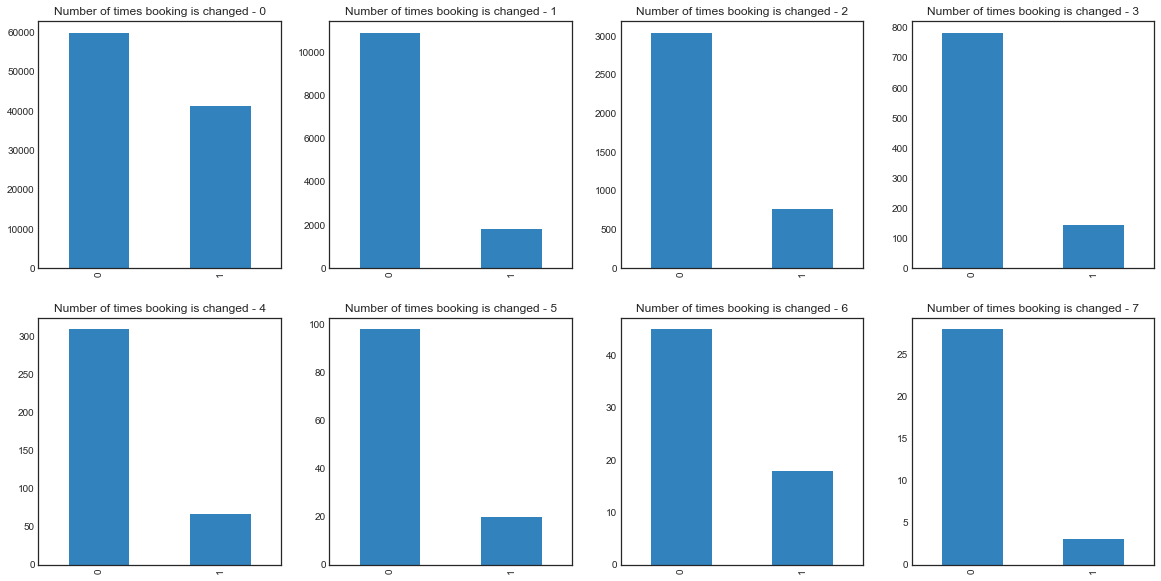

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

ax = ax.flatten()

for i in range(0, 8):
    df[df['booking_changes'] == i]['is_canceled'].value_counts().plot(kind='bar', ax=ax[i], cmap='tab20c')
    ax[i].set(title=f'Number of times booking is changed - {i}')  

**The people who change the booking tend to cancel less than the people who dont change the bookings**

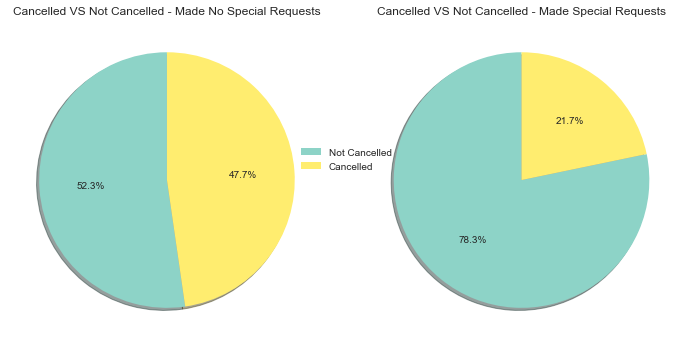

In [19]:
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=2)
fig.tight_layout()

ax = ax.flatten()

df['is_canceled'][df['total_of_special_requests']==0].value_counts().\
                               plot.pie(ax=ax[0],startangle=90, autopct='%1.1f%%',
                                        labels=None, cmap='Set3', shadow=True)
ax[0].set_ylabel('')
ax[0].set_title('Cancelled VS Not Cancelled - Made No Special Requests')


df['is_canceled'][df['total_of_special_requests']!=0].value_counts().\
                               plot.pie(ax=ax[1], startangle=90, autopct='%1.1f%%',
                                        labels=None, cmap='Set3', shadow=True);

ax[1].set_ylabel('')
ax[1].set_title('Cancelled VS Not Cancelled - Made Special Requests')

ax[0].legend(labels=['Not Cancelled','Cancelled'], loc=3, bbox_to_anchor=(0.89, 0.5));

**We can see that People who made Special Requests are less likely to cancel**

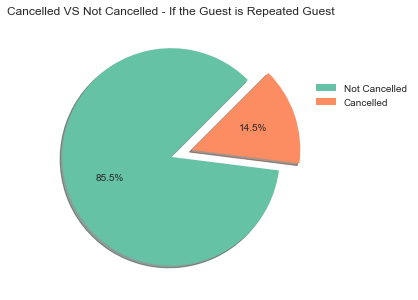

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

temp_df = df[df['is_repeated_guest'] == 1]


temp_df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',
                                      labels=None, shadow=True, explode=(0,0.2),
                                      startangle=45, center=(10,10))

ax.set_title('Cancelled VS Not Cancelled - If the Guest is Repeated Guest')
ax.set_ylabel('');
ax.legend(labels=['Not Cancelled','Cancelled'], loc=2, bbox_to_anchor=(1, 0.8));

**Repeated Guests are less likely to cancel**

# 3) Modelling

In [21]:
df2 = df.copy()

# Excluding some column from our Models
df2.drop(['reservation_status_date','reservation_status', 'arrival_date_year',
          'arrival_date_week_number', 'arrival_date_day_of_month', 'country',
          'reserved_room_type', 'assigned_room_type','arrival_date_month', 'meal'],
         axis=1, inplace=True)

In [22]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null int64
babies                            119390 non-null int64
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non-null int64
booking_changes                   119390 non-null int64
deposit_type                      119390 non-null object
days_in_waiting_list              119390 non-

In [24]:
X = df2.drop('is_canceled', axis=1)
y = df2['is_canceled']

# Converting the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['hotel', 'distribution_channel', 'market_segment',
                        'customer_type', 'deposit_type']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough'
                            )

transformed_X_train = transformer.fit_transform(X)
transformed_X_train = pd.DataFrame(transformed_X_train)

In [25]:
# Refitting the model with Transformed Data
np.random.seed(42)

#Splitting X, y into training and test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X_train, y, test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5469676758512394


In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'lbfgs', max_iter=1000)

log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

0.810243739006617


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [29]:
model = AdaBoostRegressor()

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.33698974280995986


In [30]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8174051428092806


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null int64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non

# Modelling

In [32]:
df.select_dtypes('object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [33]:
X = df.drop(['is_canceled','reservation_status_date', 'country', 'reservation_status',
             'reserved_room_type', 'assigned_room_type',], axis=1)

y = df['is_canceled']

# Converting the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['hotel', 'meal', 'market_segment',
                        'distribution_channel','arrival_date_month',
                        'deposit_type', 'customer_type']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough'
                            )

transformed_X_train = transformer.fit_transform(X)
transformed_X_train = pd.DataFrame(transformed_X_train)

# Refitting the model with Transformed Data
np.random.seed(42)

#Splitting X, y into training and test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X_train, y, test_size=0.2)

In [34]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter=1000)

log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

0.8084847977217522


In [35]:
d_tree = DecisionTreeClassifier()

d_tree.fit(X_train, y_train)
print(d_tree.score(X_test, y_test))

0.8269955607672335


In [36]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)

rand_forest.fit(X_train, y_train)
print(rand_forest.score(X_test, y_test))

0.8687075969511684


In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7723427422732222


In [38]:
models = {'KNN': KNeighborsClassifier(),
          'LogisticRegression' : LogisticRegression(solver ='liblinear', max_iter=1000),
          'RandomForestClassifier' : RandomForestClassifier(n_estimators=100)}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model.score(X_test, y_test)
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores
        

In [39]:
model_scores = fit_and_score(models=models,
                              X_train=X_train,
                              y_train=y_train,
                              X_test=X_test,
                              y_test=y_test)

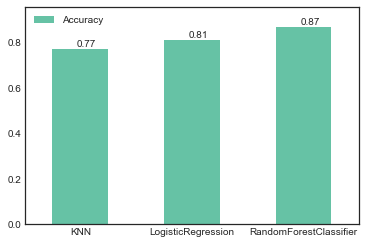

In [40]:
fig, ax = plt.subplots()

ax = pd.DataFrame(model_scores, index=['Accuracy']).T.plot(kind='bar', ax=ax)

plt.xticks(rotation=0)
plt.margins(x=0.2, y=0.1, tight=True)   
    
plot_text(plt_object=ax, bar_type='v', params=(-0.28, 0.01))    

**Conclusions**
- **We get the Highest accuracy score for Random Forest Classifier of 0.87**